## Evolutionary Strategy
ES a stochastic global optimization algorithm. Unlike other evolutionary algorithms, it does not use any form of crossover; instead, modification of candidate solutions is limited to mutation operators. In this way, Evolution Strategies may be thought of as a type of parallel stochastic hill climbing.
<br>
The algorithm involves a population of candidate solutions that initially are randomly generated. Each iteration of the algorithm involves first evaluating the population of solutions, then deleting all but a subset of the best solutions, referred to as truncation selection. The remaining solutions (the parents) each are used as the basis for generating a number of new candidate solutions (mutation) that replace or compete with the parents for a position in the population for consideration in the next iteration of the algorithm (generation).
<br>
The size of the population is referred to as *lambda* and the number of parents selected each iteration is referred to as *mu*. The number of children created from each parent is calculated as *(lambda / mu)* and parameters should be chosen so that the division has no remainder.
<br>
* **mu**: The number of parents selected each generation
* **lambda**: Size of the offspring population
* **lambda / mu**: Number of children generated from each selected parent

#### (mu, lambda)-ES
It is a version of evolution strategies where children replace parents.

#### (mu + lambda)-ES
It is a version of evolution strategies where children and parents are added to the population.

### Implementation of ES

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time

In [2]:
def es_plot(x, y, title):
    
    x1 = x[:, :, 0]
    x2 = x[:, :, 1]
     
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.set_title(title)
    
    plt.plot(x1, y, 'b-o', label='x1')
    plt.plot(x2, y, 'r-o', label='x2')
    
    ax.legend()
    
#     plt.savefig(title + '.png')
    plt.show() 

In [3]:
def es_contour_plot(domain, level, objective_function, given_X, title):
    
    d_min = np.min(domain)
    d_max = np.max(domain) 
    domain = np.arange(d_min, d_max, 0.1)
   
    x_1, x_2 = np.meshgrid(domain, domain)
    
    X = np.dstack((x_1, x_2))
    y = objective_function(X)
    
    fig = plt.figure(figsize=(5, 5))
    
    ax_1 = fig.add_subplot(1, 1, 1)

    ax_1.set_title('Contour of ' + title)
    ax_1.contour(x_1, x_2, y, cmap='turbo', levels=level)
    
    in_domain = (given_X >= d_min) * (given_X <= d_max)
    given_X = np.delete(given_X, np.where(in_domain==False)[0], axis=0)
    
    plt.plot(given_X[:, :, 0], given_X[:, :, 1], 'r+')
#     plt.savefig('Contour of '+ title+'.png')
    plt.show() 

In [4]:
def es(domain, objective_function, keep_parent, n_generation=5000, LAMBDA=500, MU=50, D=2):
    
    best_x, best_y = None, np.inf
    
    x_total = []
    y_total = []
    
    x_best = []
    y_best = []
    
    # termination
    stop_fitness = 1e-8
    
    # mutation step length (sigma parameter)
    step_size = 0.15
    
    # number of offsprings per parent
    n_offspring = int(LAMBDA / MU)

    # population range
    d_min = np.min(domain)
    d_max = np.max(domain)

    # initialize population
    population = np.random.uniform(low=d_min, high=d_max, size=(LAMBDA, D)).reshape(LAMBDA, -1, D)
    
    selcetion_type = '(mu + lambda)' if keep_parent else '(mu, lambda)'
        
    for generation in range(n_generation): 
                
        # calculate fitness for each individual in the population
        fitness = objective_function(population)
        
        # the less fitness, the higher rank
        ranks = np.argsort(np.argsort(fitness.reshape(LAMBDA)))

        # indices of first MU ranks
        selected = [i for i,_ in enumerate(ranks) if ranks[i] < MU]

        next_generation_population = []
        
        for i in selected:            
            x_total.append(population[i, :, :])
            y_total.append(fitness[i])
            
            # check if this parent is the best solution ever seen
            if fitness[i] < best_y:
                best_x, best_y = population[i, :, :], fitness[i]
                x_best.append(best_x)
                y_best.append(best_y)

            if keep_parent:
                next_generation_population.append(population[i, :, :])
                
            # create offsprings of parents
            for _ in range(n_offspring):
                offspring = np.inf
                while offspring is np.inf or offspring.any() > d_max or offspring.any() < d_min:
                    # mutation
                    offspring = (population[i, :, :] + np.random.randn(D) * step_size).reshape(-1, D)  
                next_generation_population.append(offspring)
            
        if keep_parent:
            LAMBDA = len(next_generation_population)
            
        # replace current generation with the next generation population
        population = np.array(next_generation_population).reshape(LAMBDA, -1, D)
        
        # terminate if fitness is good enough 
        if best_y <= stop_fitness:
            print("fitness is good enough")
            break

    # visualization        
    if D==2: 
        total_title = 'Total Samples of ' + objective_function.__name__ + ', Selection ' + selcetion_type+', D='+ str(D)
        best_title = 'Best Samples of ' + objective_function.__name__ + ', Selection ' + selcetion_type+', D='+ str(D)
        
        es_plot(np.asarray(x_total), np.asarray(y_total), total_title)
        es_plot(np.asarray(x_best), np.asarray(y_best), best_title)
        
        es_contour_plot([-5.12, 5.12], 15, objective_function, np.asarray(x_total), total_title)
        es_contour_plot([-5.12, 5.12], 15, objective_function, np.asarray(x_best), best_title)
    
    return best_x, best_y

## Functions

In [5]:
def visualize_function(domain, step, objective_function):
    
    d_min = np.min(domain)
    d_max = np.max(domain) 
    domain = np.arange(d_min, d_max, step)
   
    x_1, x_2 = np.meshgrid(domain, domain)
    
    X = np.dstack((x_1, x_2))
    y = objective_function(X)
    
    fig = plt.figure(figsize=(15, 15))
    
    ax_1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax_2 = fig.add_subplot(1, 2, 2, projection='3d')

    ax_1.set_title(objective_function.__name__)
    ax_1.plot_surface(x_1, x_2, y, cmap='turbo', edgecolor='k', linewidth=0.1)
    
    ax_2.set_title('Zoomed '+ objective_function.__name__)
    ax_2.plot_surface(x_1, x_2, y, cmap='turbo', edgecolor='k', linewidth=0.1)
    ax_2.set_zlim(0, 5)

#     plt.savefig(objective_function.__name__+'.png')
    plt.show() 

In [6]:
def contour_plot(domain, level, objective_function):
    
    d_min = np.min(domain)
    d_max = np.max(domain) 
    domain = np.arange(d_min, d_max, 0.1)
   
    x_1, x_2 = np.meshgrid(domain, domain)
    
    X = np.dstack((x_1, x_2))
    y = objective_function(X)
    
    fig = plt.figure(figsize=(5, 5))
    
    ax_1 = fig.add_subplot(1, 1, 1)

    ax_1.set_title('Contour of '+objective_function.__name__)
    ax_1.contour(x_1, x_2, y, cmap='turbo', levels=level)
    
    plt.plot(0, 0, 'r+')
#     plt.savefig('Contour of '+objective_function.__name__+'.png')
    plt.show() 

In [7]:
def call_es(domain, objective_function, keep_parent, D):
    start_time = time.time()
    best_x, best_y = es(domain=domain,
                        objective_function=objective_function,
                        keep_parent=keep_parent,
                        D=D)
    print(best_x, best_y)
    print("--- execution time: %s seconds ---" % (time.time() - start_time))

### Sphere Function

<center>${f(x) = \sum_{i=1}^{d}x_{i}^{2}}$</center>

**Dimensions:** 
<center>${d}$</center>

**Domain:**
<center>${-5.12 \leq x_{i} \leq 5.12}$</center>

**Global Optimum:**
<center>${\quad f(x) = 0.0\;}$ at ${\;x=(0.0, 0.0, ..., 0.0)}$</center>

**Visualization:**

In [8]:
def Sphere(x):
    return np.sum(np.square(x), axis=2)

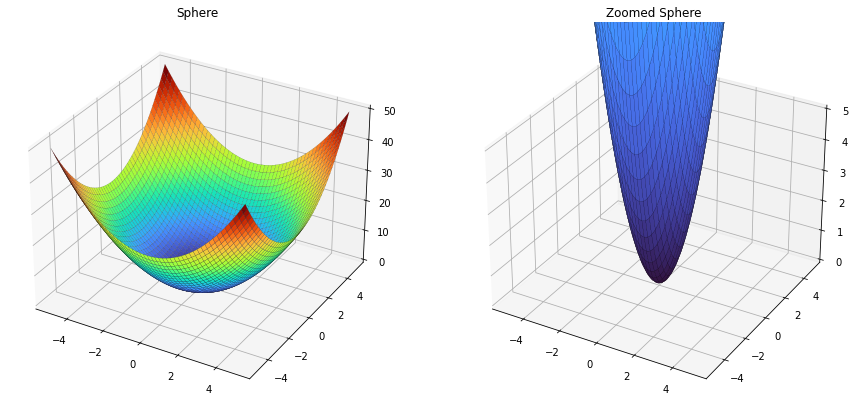

In [9]:
visualize_function(domain=[-5, 5],
                   step=0.01, 
                   objective_function=Sphere)

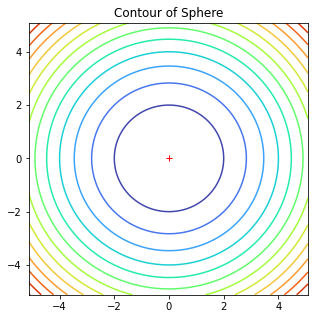

In [10]:
contour_plot(domain=[-5.12, 5.12],
             level=15, 
             objective_function=Sphere)

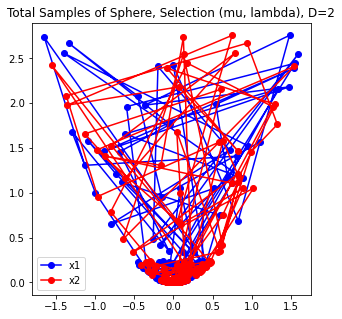

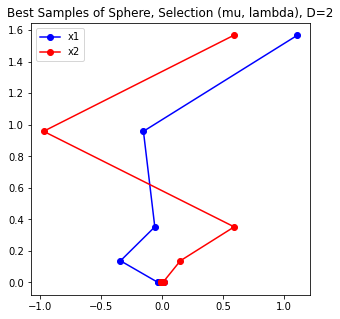

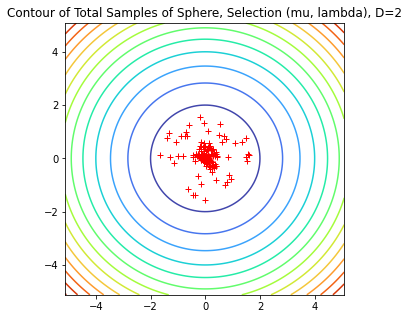

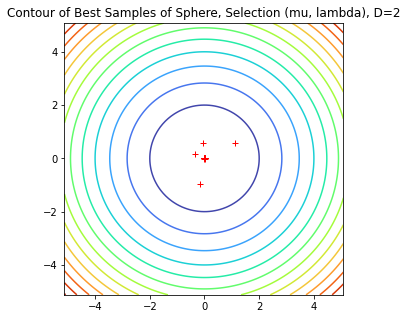

[[-5.74863206e-05  1.12672906e-04]] [1.59998608e-08]
--- execution time: 44.2265522480011 seconds ---


In [11]:
domain=[-5.12, 5.12]
objective_function=Sphere

# (mu, lambda)
call_es(domain, objective_function, keep_parent=False, D=2)
# call_es(domain, objective_function, keep_parent=False, D=16)
# call_es(domain, objective_function, keep_parent=False, D=32)

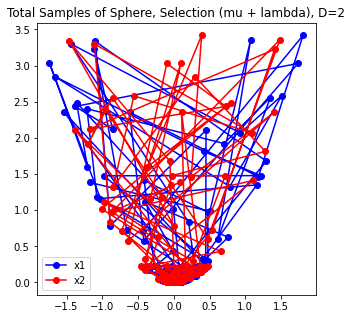

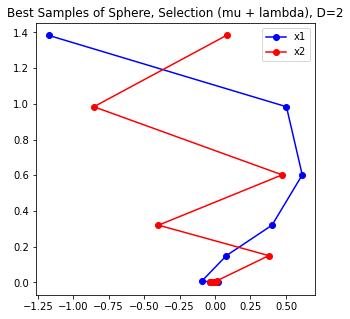

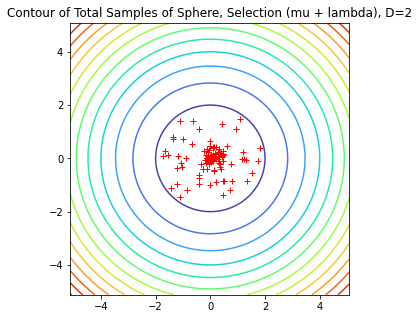

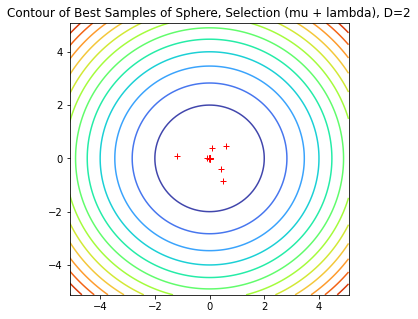

[[-9.44944347e-05  7.50628133e-05]] [1.45636241e-08]
--- execution time: 43.92594265937805 seconds ---


In [12]:
domain=[-5.12, 5.12]
objective_function=Sphere

# (mu + lambda)
call_es(domain, objective_function, keep_parent=True, D=2)
# call_es(domain, objective_function, keep_parent=True, D=16)
# call_es(domain, objective_function, keep_parent=True, D=32)

### Rastrigin Function

<center>${f(x) = 10d + \sum_{i=1}^{d}[x_{i}^{2} - 10cos(2\pi x_{i})]}$</center>

**Dimensions:** 
<center>${d}$</center>

**Domain:**
<center>${-5.12 \leq x_{i} \leq 5.12}$</center>

**Global Optimum:**
<center>${\quad f(x) = 0.0\;}$ at ${\;x=(0.0, 0.0, ..., 0.0)}$</center>

**Visualization:**

In [13]:
def Rastrigin(x):
    d = x.shape[2]
    return 10*d + np.sum(np.square(x) - 10*(np.cos(2*np.pi*x)), axis=2)

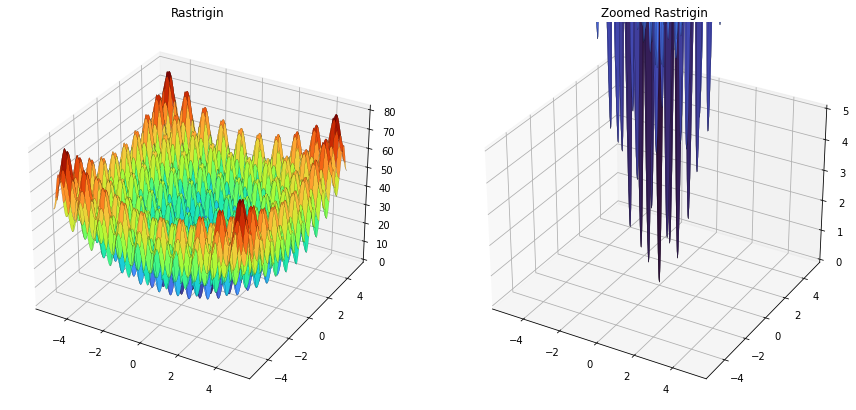

In [14]:
visualize_function(domain=[-5, 5],
                   step=0.01, 
                   objective_function=Rastrigin)

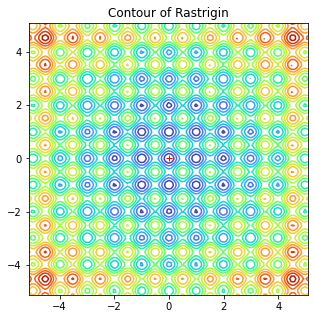

In [15]:
contour_plot(domain=[-5.12, 5.12],
             level=15, 
             objective_function=Rastrigin)

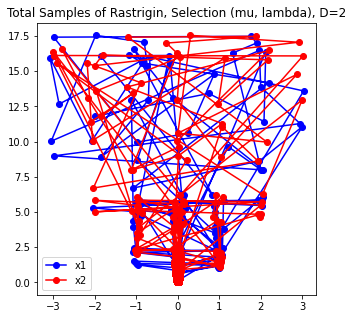

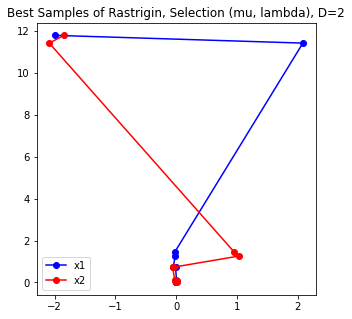

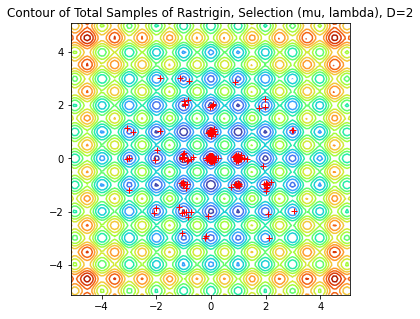

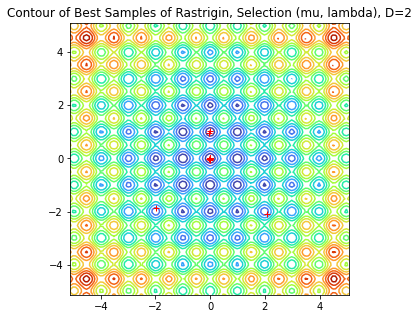

[[7.59730265e-05 1.89733666e-05]] [1.21651832e-06]
--- execution time: 45.86628437042236 seconds ---


In [16]:
domain=[-5.12, 5.12]
objective_function=Rastrigin

# (mu, lambda)
call_es(domain, objective_function, keep_parent=False, D=2)
# call_es(domain, objective_function, keep_parent=False, D=16)
# call_es(domain, objective_function, keep_parent=False, D=32)

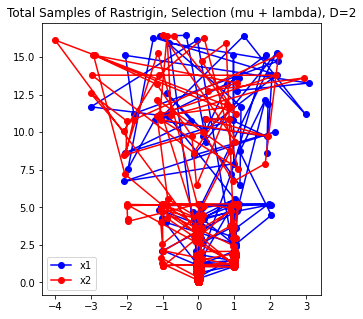

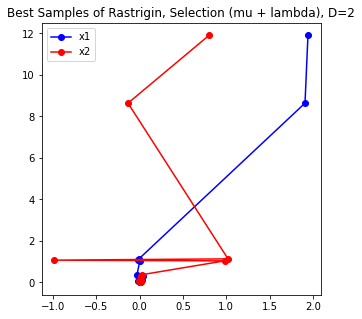

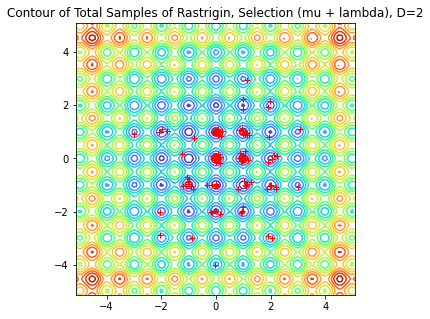

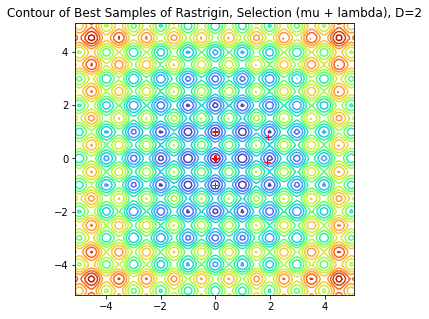

[[-0.0002201   0.00016239]] [1.48426644e-05]
--- execution time: 44.473445653915405 seconds ---


In [17]:
domain=[-5.12, 5.12]
objective_function=Rastrigin

# (mu + lambda)
call_es(domain, objective_function, keep_parent=True, D=2)
# call_es(domain, objective_function, keep_parent=True, D=16)
# call_es(domain, objective_function, keep_parent=True, D=32)

### Ackley Function

<center>${f(x) = 20 + e - 20e^{-\frac{1}{5}\sqrt{\frac{1}{d}\sum_{i=1}^{d}x_{i}^{2}}}-e^{\frac{1}{d}\sum_{i=1}^{d}cos(2\pi x_{i})}}$</center>

**Dimensions:** 
<center>${d}$</center>

**Domain:**
<center>${-32.768 \leq x_{i} \leq 32.768}$</center>

**Global Optimum:**
<center>${\quad f(x) = 0.0\;}$ at ${\;x=(0.0, 0.0, ..., 0.0)}$</center>

**Visualization:**

In [18]:
def Ackley(x):
    d = x.shape[2]
    return 20 - 20*np.exp(-0.2*np.sqrt((1/d)*np.sum(np.square(x), axis=2))) + np.e - np.exp((1/d)*np.sum((np.cos(2*np.pi*x)), axis=2))

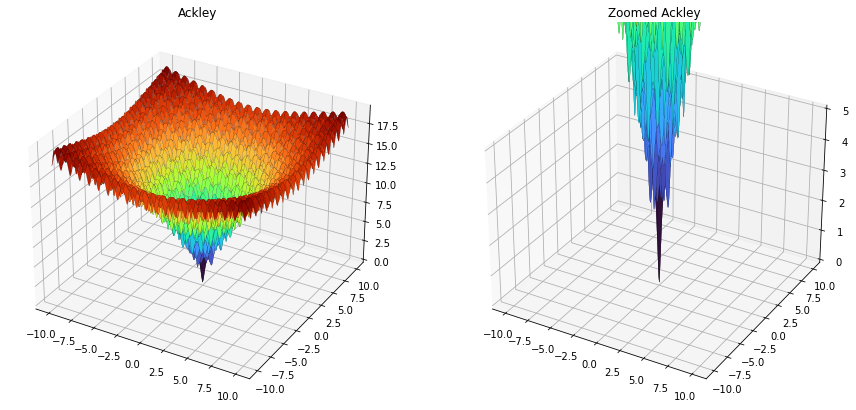

In [19]:
visualize_function(domain=[-10, 10],
                   step=0.01, 
                   objective_function=Ackley)

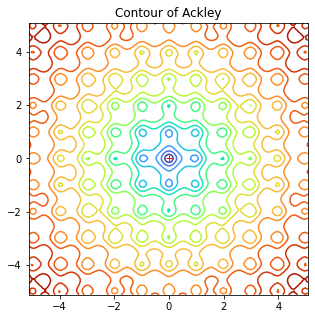

In [20]:
contour_plot(domain=[-5.12, 5.12],
             level=15, 
             objective_function=Ackley)

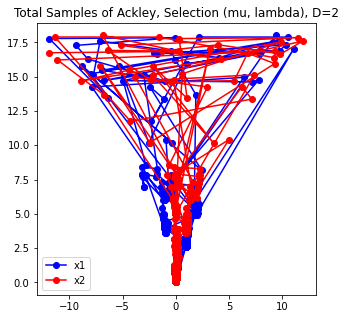

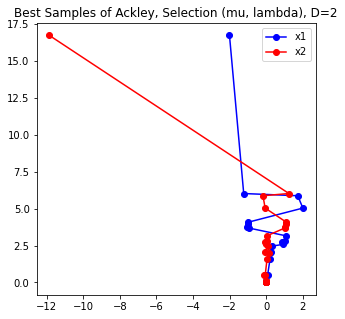

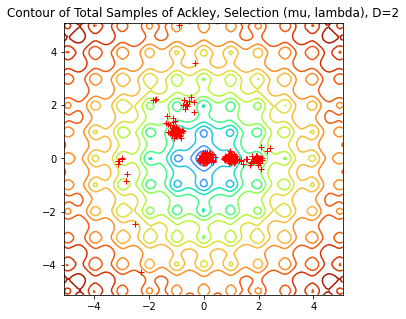

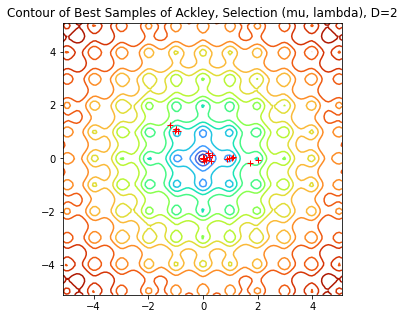

[[ 5.64905804e-05 -5.45282029e-05]] [0.00022224]
--- execution time: 44.1380877494812 seconds ---


In [21]:
domain=[-32.768, 32.768]
objective_function=Ackley

# (mu, lambda)
call_es(domain, objective_function, keep_parent=False, D=2)
# call_es(domain, objective_function, keep_parent=False, D=16)
# call_es(domain, objective_function, keep_parent=False, D=32)

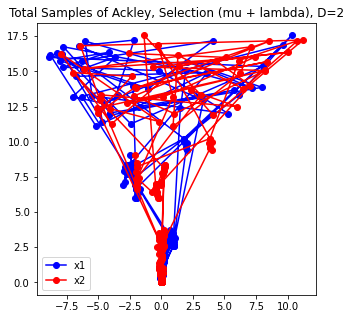

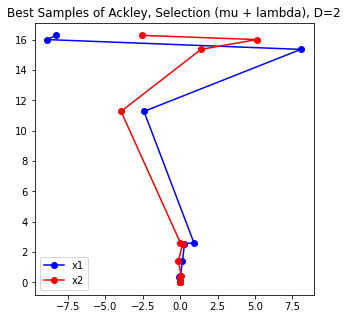

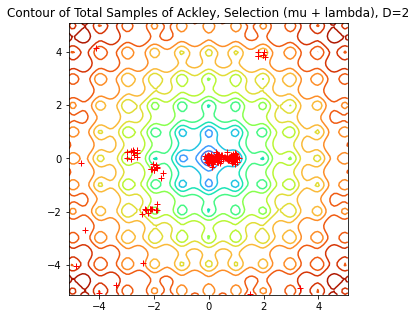

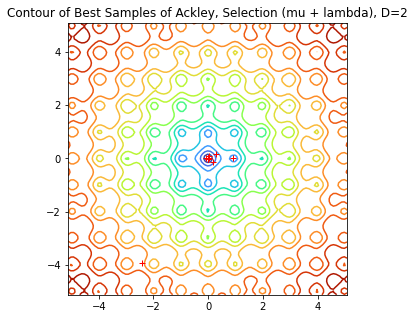

[[-4.45316286e-06  3.06143269e-05]] [8.752715e-05]
--- execution time: 46.13380026817322 seconds ---


In [22]:
domain=[-32.768, 32.768]
objective_function=Ackley

# (mu + lambda)
call_es(domain, objective_function, keep_parent=True, D=2)
# call_es(domain, objective_function, keep_parent=True, D=16)
# call_es(domain, objective_function, keep_parent=True, D=32)